In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
customers = pd.reads_csv('USA_Housing.csv')
customers.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
customers.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


C:\Users\raghavendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


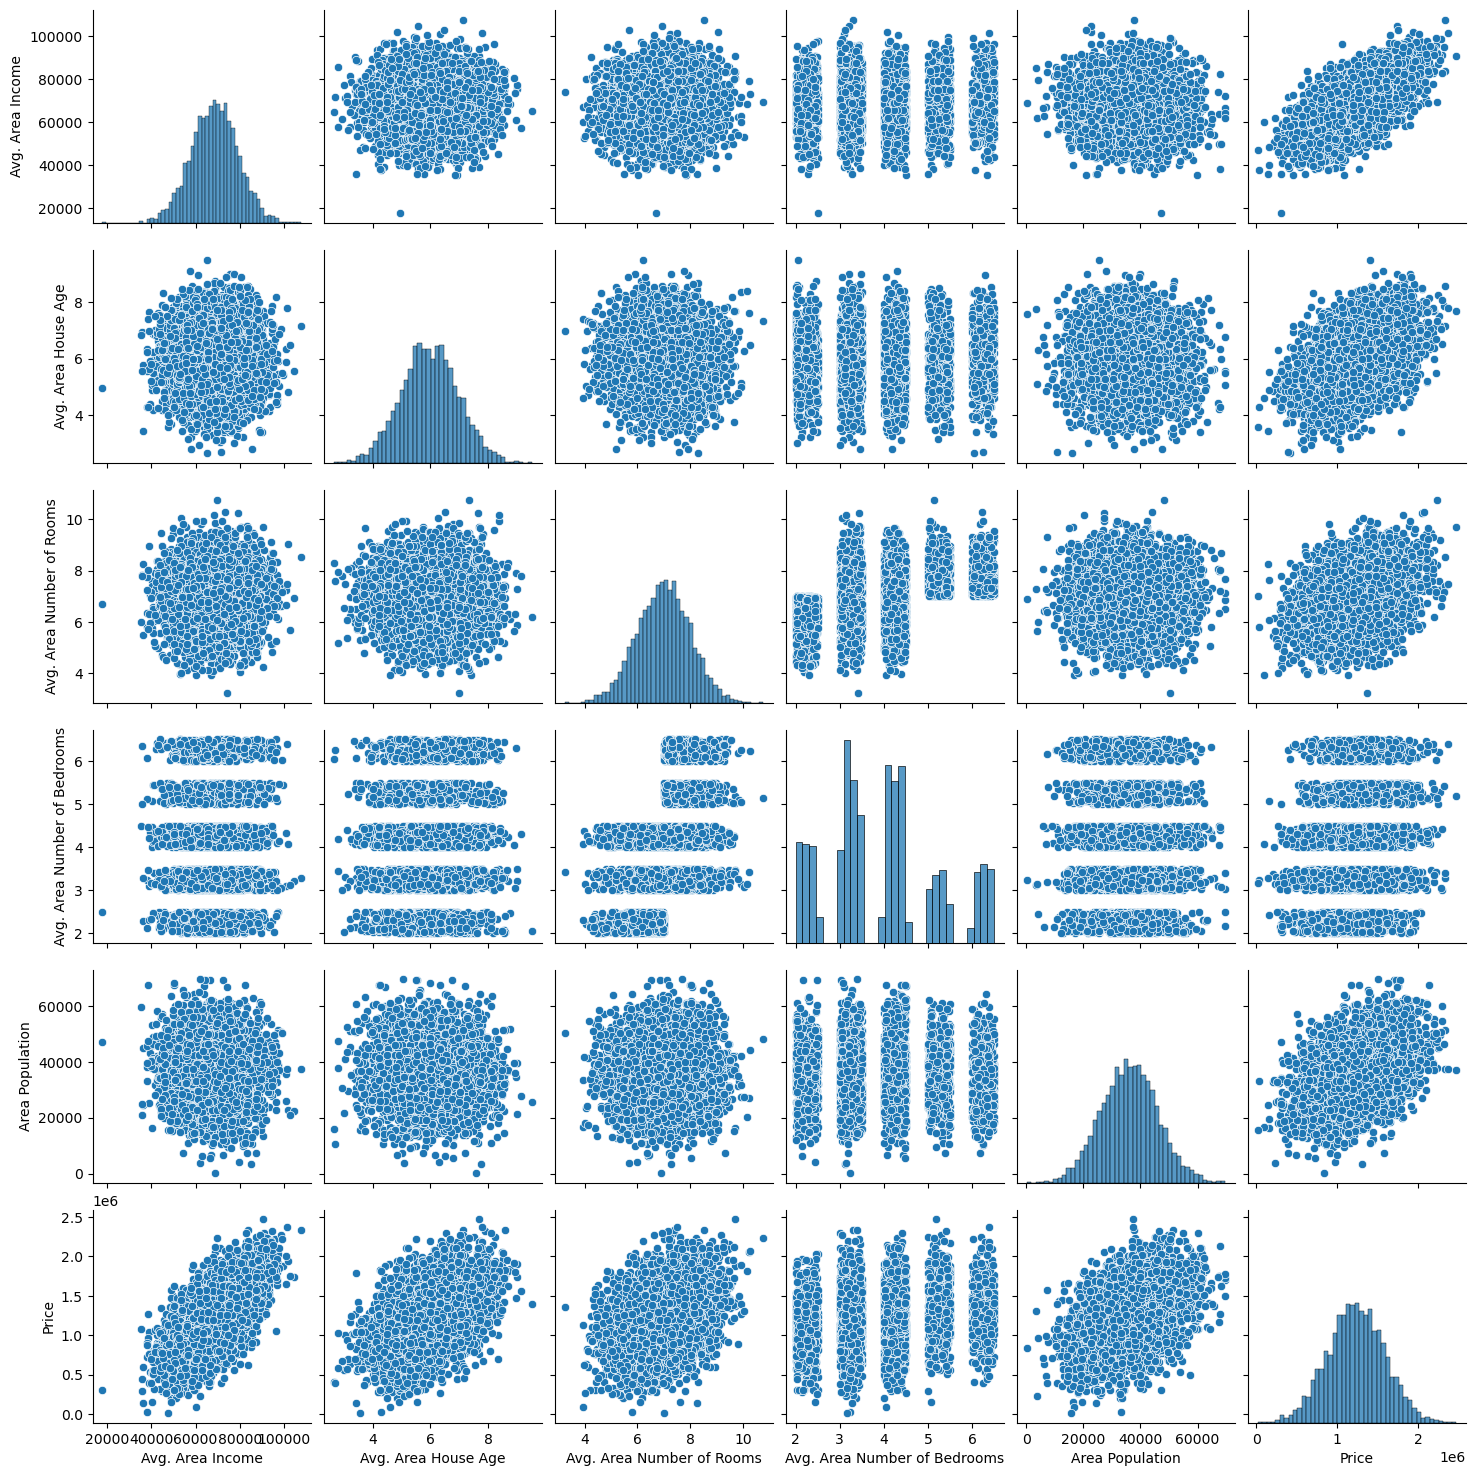

In [5]:
sns.pairplot(customers)
plt.savefig('output.jpg')

In [6]:
scaler = StandardScaler()

X=customers.drop(['Price','Address'],axis=1)
y=customers['Price']

cols = X.columns

X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(y_test,pred)

0.9185060945460737

<Axes: xlabel='Price'>

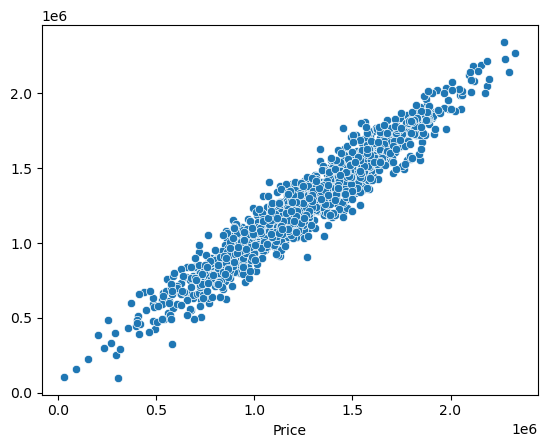

In [9]:
sns.scatterplot(x=y_test, y=pred)

Enter the value of k: 3


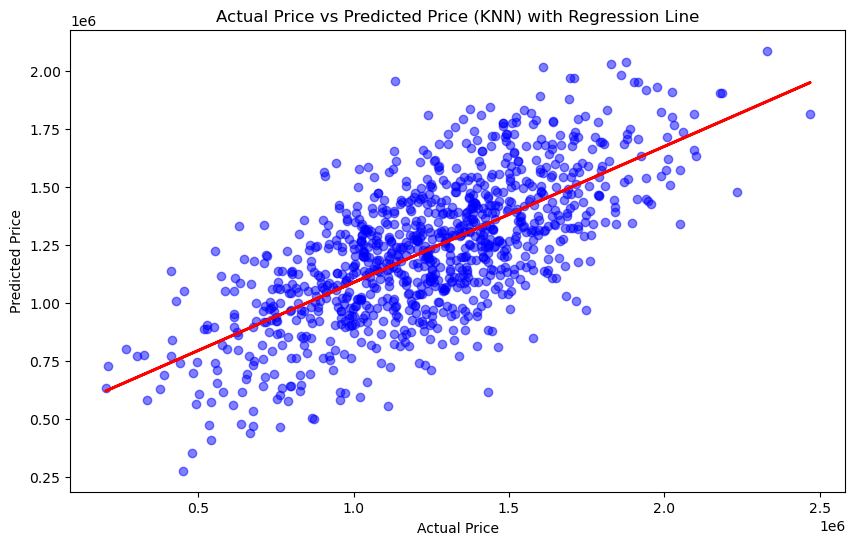

Mean Squared Error: 68667790171.76


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
data = pd.read_csv('USA_Housing.csv')
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = int(input("Enter the value of k: "))
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test + intercept
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, regression_line, color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (KNN) with Regression Line')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

<Axes: xlabel='Price', ylabel='Count'>

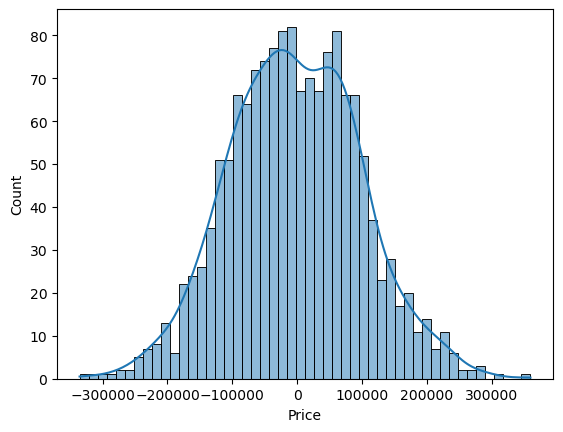

In [10]:
sns.histplot((y_test-pred),bins=50,kde=True)

In [11]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,230377.522563
Avg. Area House Age,163793.118567
Area Population,151104.850811
Avg. Area Number of Rooms,122101.350267
Avg. Area Number of Bedrooms,1627.317235


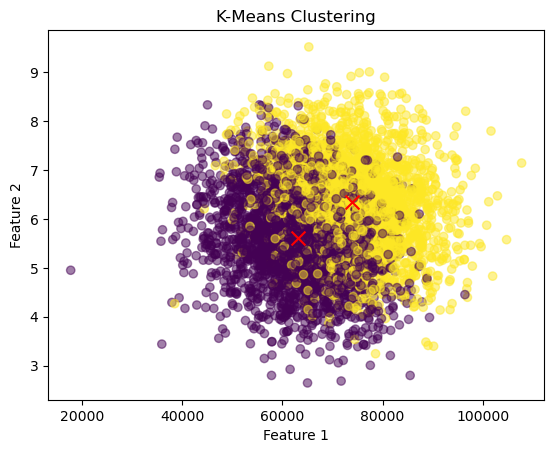

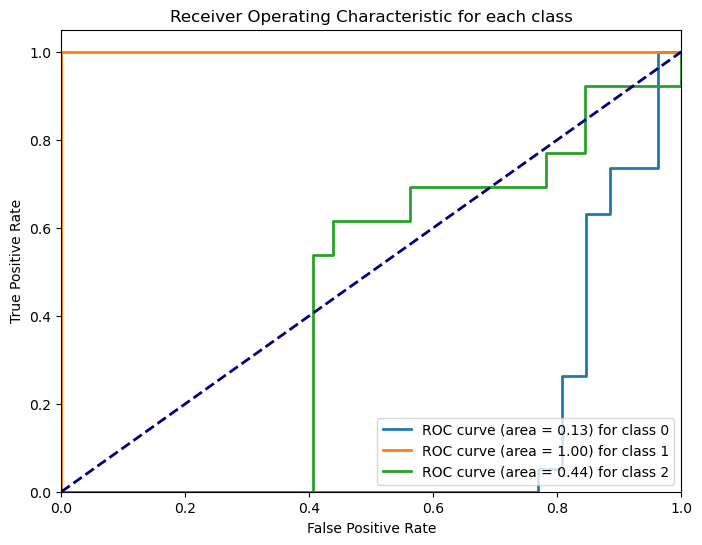

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('USA_Housing.csv')

numeric_data = df.select_dtypes(include=['float64', 'int64'])

# WCSS evaluation (replaced with silhouette score)
# wcss = []
# for i in range(1, 15):
#   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600, n_init=1)
#   kmeans.fit(numeric_data)
#   wcss.append(kmeans.inertia_)

# Silhouette Score for evaluation
silhouette_scores = []
for i in range(2, 10):  # Adjust range for desired number of clusters to evaluate
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600, n_init=1)
    kmeans.fit(numeric_data)
    silhouette_score_val = silhouette_score(numeric_data, kmeans.labels_)
    silhouette_scores.append(silhouette_score_val)

# Choose n_clusters based on highest silhouette score
n_clusters_index = np.argmax(silhouette_scores) + 2  # Adjust for starting range offset
n_clusters = n_clusters_index

# KMeans with chosen n_clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=600, n_init=1)
kmeans.fit(numeric_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualization (unchanged)
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(8, 6))
lw = 2
for i in range(3):  # Number of classes
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc, i))

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()


Enter the value of k: 3


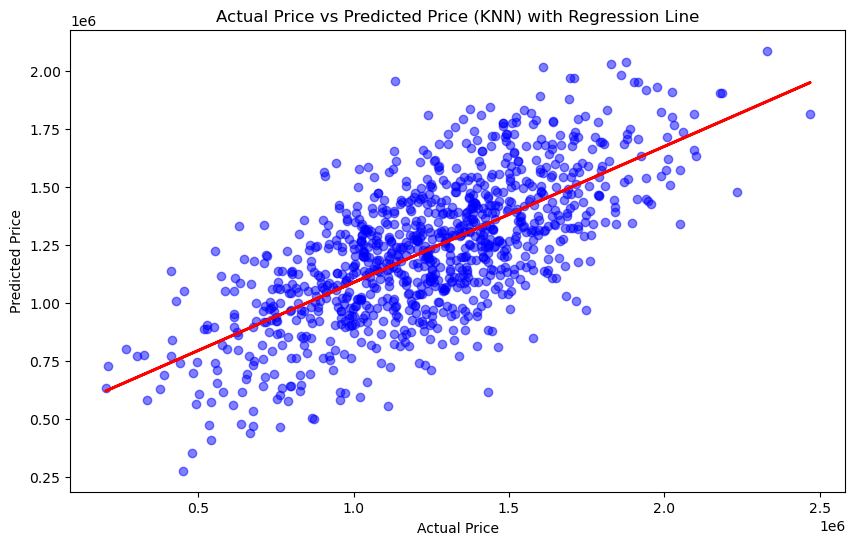

Mean Squared Error: 68667790171.76


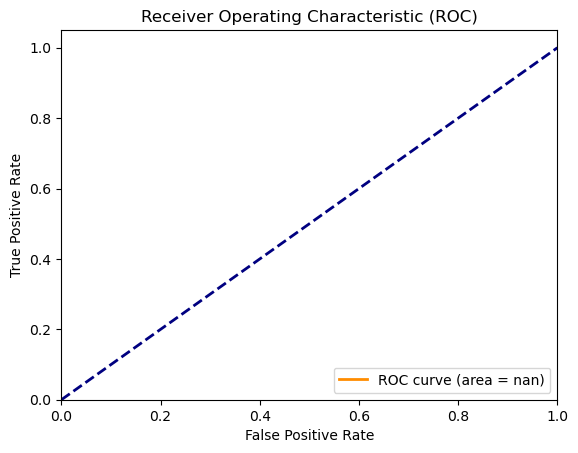

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('USA_Housing.csv')
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = int(input("Enter the value of k: "))
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test + intercept

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, regression_line, color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (KNN) with Regression Line')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Mean Squared Error (MSE): 14391497208.582758


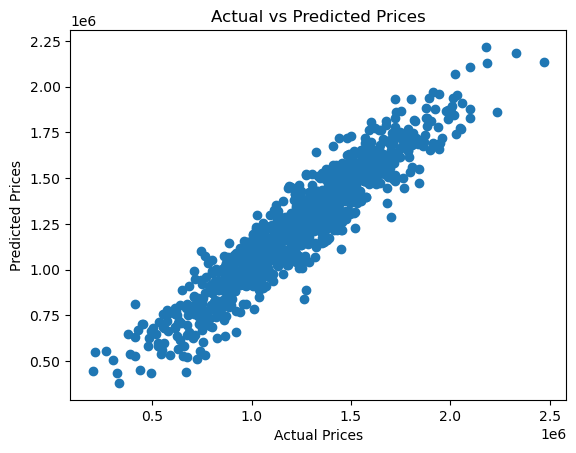

C:\Users\raghavendra\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


NameError: name 'svm_model' is not defined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("USA_Housing.csv")

# Assuming 'Price' is the target variable and the rest are features
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Define a threshold for classification
threshold = 0.5

# Convert regression predictions into binary classification labels
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)
# Predict using the SVM model
y_pred = svm_model.predict(X_test_scaled)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
data = pd.read_csv('USA_Housing.csv')
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Print column names and first few rows (optional)
print(data.columns)
print(data.head())

# Define target variable and features
target = 'Price'
X = numeric_data.drop(target, axis=1)
y = numeric_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree Regressor model
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on test set
predictions = clf.predict(X_test)

# Evaluate using Mean Absolute Error (MAE) and R-squared
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)  # R-squared: Coefficient of determination

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared: {r2:.2f}")  # Higher R-squared indicates better fit


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05 

Silhouette Score: -0.7907563685499958


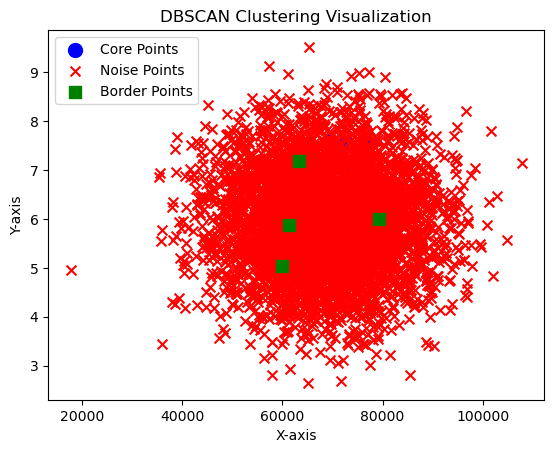

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Circle
from sklearn.metrics import silhouette_score
eps = 1.9
minPts = 4
data = pd.read_csv("USA_Housing.csv")
data_points = data[["Avg. Area Income", "Avg. Area House Age"]].to_numpy()
distances = []
for i in range(len(data_points)):
    botList = []
    for j in range(len(data_points)):
        # Calculate Euclidean distance
        d = np.sqrt(((data_points[i][0] - data_points[j][0]) ** 2) + ((data_points[i][1] - data_points[j][1]) ** 2))
        botList.append(round(d, 3))
    distances.append(botList)
distances_array = np.array(distances)
points = []
for i in range(len(data_points)):
    inPoint = [i + 1] 
    for j in range(len(data_points)):
        if i == j:
            continue
        if distances[i][j] <= eps:
            inPoint.append(j + 1)  
    points.append(inPoint)
    table1 = []
for i in range(len(data_points)):
    inTable1 = []
    inTable1.append(i + 1)  
    if len(points[i]) >= minPts:
        inTable1.append("Core")
    else:
        inTable1.append("Noise")
    table1.append(inTable1)
border = []
for i in range(len(points)):
    if table1[i][1] == "Core": 
        for j in range(1, len(points[i])): 
            for k in range(len(table1)):
                if (points[i][j] == table1[k][0]) and (table1[k][1] == "Noise"):
                    border.append(j + 1) 
table2 = table1.copy()  
for i in range(len(border)):
    table2[border[i] - 1][1] = "Border"
    core_points = [data_points[i] for i in range(len(table2)) if table2[i][1] == "Core"]
noise_points = [data_points[i] for i in range(len(table2)) if table2[i][1] == "Noise"]
border_points = [data_points[i] for i in range(len(table2)) if table2[i][1] == "Border"]

core_x, core_y = zip(*core_points) 
noise_x, noise_y = zip(*noise_points)
border_x, border_y = zip(*border_points)
plt.scatter(
    core_x, core_y, color="blue", label="Core Points", s=100, marker="o"
)
plt.scatter(noise_x, noise_y, color="red", label="Noise Points", s=50, marker="x")
plt.scatter(border_x, border_y, color="green", label="Border Points", s=75, marker="s")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("DBSCAN Clustering Visualization")
plt.legend()

silhouette_avg = silhouette_score(data_points, labels)
print("Silhouette Score:", +silhouette_avg) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
data = pd.read_csv('USA_Housing.csv')
X = data[['Avg. Area Income']].values
y = data['Avg. Area House Age'].values
kernel = 1.0* RBF(length_scale=1.0)
gp= GaussianProcessRegressor (kernel=kernel, n_restarts_optimizer=10) 
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size=0.5, random_state=0)
gp.fit(X_train, y_train)
y_pred, sigma = gp.predict(X_test, return_std=True)
x = np.linspace(X.min(), X.max(), 1000) [:, np.newaxis]
y_mean, y_cov = gp.predict(x, return_cov=True)
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, c='r', label='Training Data')
plt.plot(x, y_mean, 'k', lw=2, zorder=9, label='Predicted Mean')
plt.fill_between(x[:, 0], y_mean-1.96 * np.sqrt(np.diag(y_cov)), y_mean + 1.96 *
np.sqrt(np.diag(y_cov)), alpha=0.2, color='k', label='95% Confidence Interval')
plt.xlabel('Avg. Area Income')
plt.ylabel('Avg. Area House Age')
plt.legend()
plt.show()
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Entropy calculation for input dataset:

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play_tennis, dtype: object

Total Entropy(S) of play_tennis Dataset➡ 0.9402859586706309

Information gain of day is ➡ 0.9402859586706309

Information gain of outlook is ➡ 0.246749819774439

Information gain of temperature is ➡ 0.029222565658954647

Information gain of humidity is ➡ 0.15183550136234136

Information gain of wind is ➡ 0.04812703040826927

Attribute with the maximum gain is ➡ day

Hence, the Root node will be ➡ day

The Resultant Decision Tree is: ⤵

{'day': {'d1': 'no',
         'd10': 'yes',
         'd11': 'yes',
         'd12': 'yes',
         'd13': 'yes',
         'd14': 'no',
         'd2': 'no',
         'd3': 'yes',
         'd4': 'yes',
         'd5': 'yes',
         'd6': 'no',
         'd7': 'yes',
         'd8': 'no',
         'd9': 'yes'}}


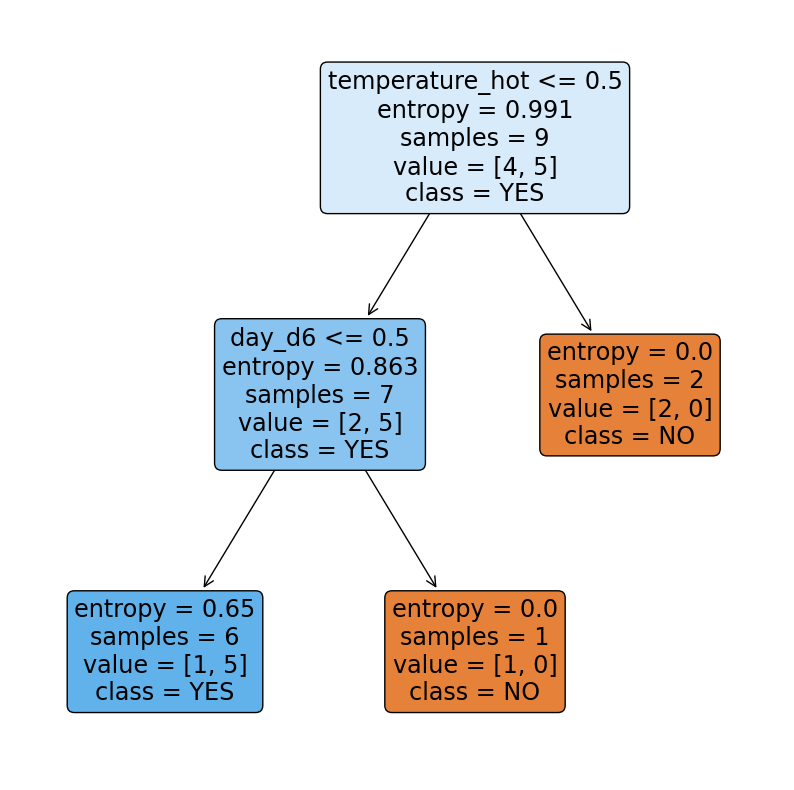

In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import math
from pprint import pprint
import matplotlib.pyplot as plt

# Function to calculate entropy
def entropy(probs):
    return sum([-prob * math.log(prob, 2) for prob in probs])

# Function to calculate entropy of a list
def entropy_of_list(ls, value):
    total_instances = len(ls)
    cnt = Counter(x for x in ls)
    probs = [x / total_instances for x in cnt.values()]
    return entropy(probs)

# Function to calculate information gain
def information_gain(df, split_attribute, target_attribute, battr):
    df_split = df.groupby(split_attribute)
    new_entropy = sum(
        df_split.apply(lambda x: entropy_of_list(x[target_attribute], x.name))
        * df_split.size()
        / len(df)
    )
    if battr != "S":
        old_entropy = entropy_of_list(
            df[target_attribute], "S-" + str(df.iloc[0][df.columns.get_loc(battr)])
        )
    else:
        old_entropy = entropy_of_list(df[target_attribute], battr)
    return old_entropy - new_entropy

# ID3 Algorithm
def id3(df, target_attribute, attribute_names, default_class=None, default_attr="S"):
    cnt = Counter(x for x in df[target_attribute])
    if len(cnt) == 1:
        return next(iter(cnt))
    elif df.empty or not attribute_names:
        return default_class
    else:
        default_class = max(cnt.keys())
        gainz = []
        for attr in attribute_names:
            ig = information_gain(df, attr, target_attribute, default_attr)
            gainz.append(ig)
            print("\nInformation gain of", attr, "is ➡", ig)
            print("=========================================================")

        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        print("\nAttribute with the maximum gain is ➡", best_attr)
        print("\nHence, the Root node will be ➡", best_attr)
        print("=========================================================")
        tree = {best_attr: {}}
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(
                data_subset,
                target_attribute,
                remaining_attribute_names,
                default_class,
                best_attr,
            )
            tree[best_attr][attr_val] = subtree
        return tree

# Function to calculate entropy of dataset
def entropy_dataset(a_list):
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list) * 1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

# Read dataset
df = pd.read_csv("desision tree(dataset).csv")

# Display dataset information
print("Entropy calculation for input dataset:\n")
print(df['play_tennis'])
total_entropy = entropy_dataset(df['play_tennis'])
print("\nTotal Entropy(S) of play_tennis Dataset➡", total_entropy)
print("=========================================================")

# Build Decision Tree
attribute_names = list(df.columns[:-1])
t = df.columns[-1]
tree = id3(df, t, attribute_names)
print("\nThe Resultant Decision Tree is: ⤵\n")
pprint(tree)

# Classification
def classify(instance, tree, default=None):
    attribute = next(iter(tree))
    if instance[attribute] in tree[attribute].keys():
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):
            return classify(instance, result)
        else:
            return result
    else:
        return default

# Apply classification on the dataset
df_new = pd.read_csv("desision tree(dataset).csv")
df_new['Predicted'] = df_new.apply(classify, axis=1, args=(tree, "?"))

# Encoding categorical variables for sklearn
df_getdummy = pd.get_dummies(
    data=df, columns=["day", "outlook", "temperature", "wind"]
)

# Splitting data for sklearn
X = df_getdummy.drop("play_tennis", axis=1)
y = df_getdummy["play_tennis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101
)

# Encoding categorical variables for sklearn
encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == "object":
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])

# Fitting Decision Tree classifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dtree.fit(X_train, y_train)

# Making predictions
predictions = dtree.predict(X_test)

# Convert Index to list for feature_names parameter
feature_names = list(X.columns)

# Plotting decision tree
fig = plt.figure(figsize=(10, 10))
a = plot_tree(
    dtree,
    feature_names=feature_names,
    class_names=["NO", "YES"],
    filled=True,
    rounded=True,
)
plt.show()


Mean Squared Error: 63314173405.02581
R-squared: 0.48538640415828727
Percentage of Predictions Within 10% of Actual Price: 35.099999999999994 %


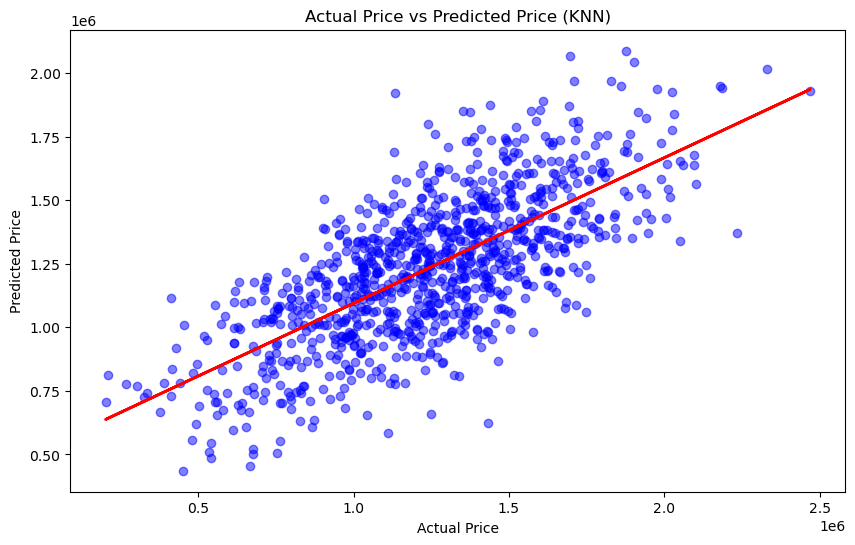

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset from the CSV file
data = pd.read_csv('USA_Housing.csv')

# Extract features and target variable
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor
regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors for the number of neighbors to consider

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the regression line (optional for visualization)
slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test + intercept

# Create a scatter plot with regression line (optional for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, regression_line, color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (KNN)')
# plt.show()  # Uncomment to display the plot

# Evaluate using mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# While accuracy isn't directly applicable here, you can estimate a 'correctness' metric"
# This is application-specific and depends on your acceptable error range
# Here, we calculate the percentage of predictions within 10% of the actual price
correct_predictions = np.count_nonzero(np.abs(y_test - y_pred) <= (y_test * 0.1)) / len(y_test)
print("Percentage of Predictions Within 10% of Actual Price:", correct_predictions * 100, "%")


In [10]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset from the CSV file
data = pd.read_csv('USA_Housing.csv')

# Select features (replace with your actual features)
# Assuming 'Price' is the target variable
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
target = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.2, random_state=42)

# Create the LightGBM model (adjust hyperparameters as needed)
lgb_model = LGBMRegressor(objective='regression',
                            num_leaves=31,
                            learning_rate=0.1,
                            n_estimators=100)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate using mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
correct_predictions = np.count_nonzero(np.abs(y_test - y_pred) <= (y_test * 0.1)) / len(y_test)
print("Percentage of Predictions Within 10% of Actual Price:", correct_predictions * 100, "%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 5
[LightGBM] [Info] Start training from score 1229576.992612
Mean Squared Error: 12313469588.669224
R-squared: 0.8999168981994536
Percentage of Predictions Within 10% of Actual Price: 72.7 %


In [9]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.3 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.3 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 9.4 MB/s eta 0:00:00


In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset from the CSV file
data = pd.read_csv('USA_Housing.csv')

# Select features (replace with your actual features)
# Assuming 'Price' is the target variable
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
target = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.2, random_state=42)

# Create the XGBoost model (adjust hyperparameters as needed)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             colsample_bytree=0.4,
                             learning_rate=0.1,
                             max_depth=5,
                             alpha=10,
                             n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate using mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
correct_predictions = np.count_nonzero(np.abs(y_test - y_pred) <= (y_test * 0.1)) / len(y_test)
print("Percentage of Predictions Within 10% of Actual Price:", correct_predictions * 100, "%")


Mean Squared Error: 12138577281.298393
R-squared: 0.901338411809138
Percentage of Predictions Within 10% of Actual Price: 73.3 %


In [12]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.4/99.8 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 2.7/99.8 MB 14.2 MB/s eta 0:00:07
   - -------------------------------------- 4.1/99.8 MB 16.2 MB/s eta 0:00:06
   -- ------------------------------------- 5.2/99.8 MB 18.3 MB/s eta 0:00:06
   -- ------------------------------------- 5.9/99.8 MB 18.0 MB/s eta 0:00:06
   -- ------------------------------------- 7.3/99.8 MB 18.6 MB/s eta 0:00:05
   --- -------------------------

In [14]:
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset from the CSV file
data = pd.read_csv('USA_Housing.csv')

# Select features (replace with your actual features)
# Assuming 'Price' is the target variable
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
target = data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], target, test_size=0.2, random_state=42)

# Define base models (replace or add models as needed)
estimators = [
    ('lr', LinearRegression()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror')),  # Install XGBoost: pip install xgboost
    ('lgb', LGBMRegressor(objective='regression'))  # Install LightGBM: pip install lightgbm
]

# Define the final estimator (can be any regression model)
final_estimator = LinearRegression()

# Create the StackingRegressor model
stack_reg = StackingRegressor(estimators=estimators,
                              final_estimator=final_estimator)

# Train the model
stack_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stack_reg.predict(X_test)

# Evaluate using mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# While accuracy isn't directly applicable here, you can estimate a 'correctness' metric
# This is application-specific and depends on your acceptable error range
# Here, we calculate the percentage of predictions within 10% of the actual price
correct_predictions = np.count_nonzero(np.abs(y_test - y_pred) <= (y_test * 0.1)) / len(y_test)
print("Percentage of Predictions Within 10% of Actual Price:", correct_predictions * 100, "%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 5
[LightGBM] [Info] Start training from score 1229576.992612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 5
[LightGBM] [Info] Start training from score 1228139.658158
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhe

In [26]:
# Compute precision-recall curve


NameError: name 'precision_recall_curve' is not defined

Mean Squared Error (MSE): 14391497208.582758


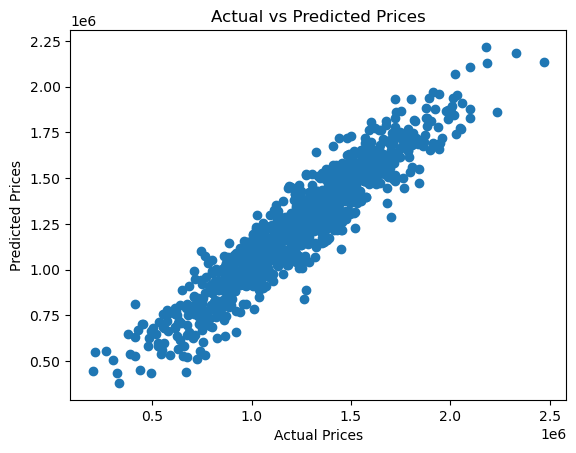

C:\Users\raghavendra\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1123: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


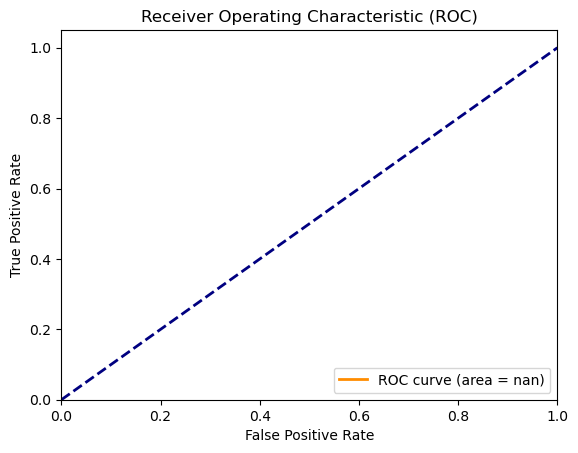

Enter the value of k: 3


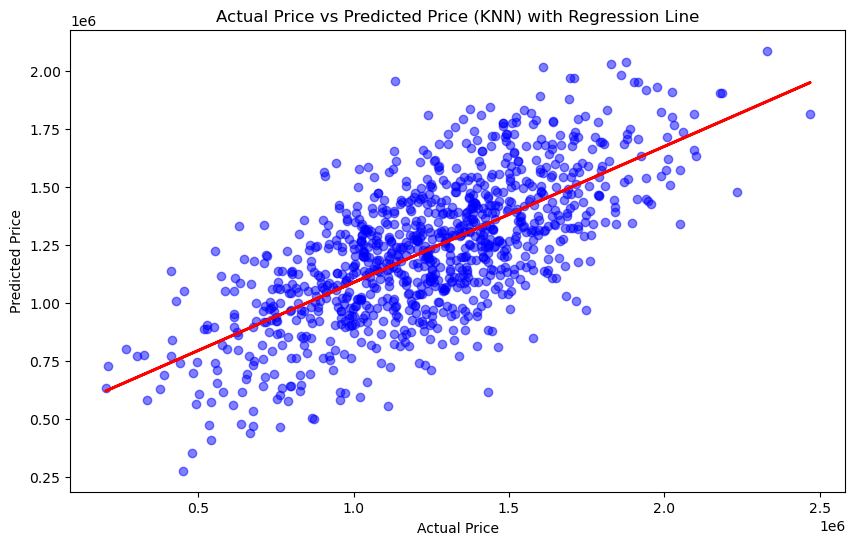

Mean Squared Error: 68667790171.76


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv("USA_Housing.csv")

# Assuming 'Price' is the target variable and the rest are features
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Predict the prices for the test set
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Define a threshold for classification
threshold = 0.5

# Convert regression predictions into binary classification labels
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('USA_Housing.csv')
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = int(input("Enter the value of k: "))
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test + intercept

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(y_test, regression_line, color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price (KNN) with Regression Line')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('USA_Housing.csvUSA_Housing.csv')

# Feature selection
selected_features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
X = data[selected_features]
y = data['Price']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
model = KNeighborsRegressor(n_neighbors=5)  # Using 5 neighbors as an example
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("Root Mean Squared Error:", rmse)

# Prediction
new_data = pd.DataFrame([[80000, 5, 6, 3, 30000]], columns=selected_features)
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print("Predicted Price:", predicted_price)

Root Mean Squared Error: 126942.10644696314
Predicted Price: [1129351.10306]


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor  # Import CatBoost

def catboost_regression(csv_file_path):
    """
    Performs CatBoost regression on a dataset from a CSV file.

    Args:
        csv_file_path (str): The path to the CSV file containing the data.

    Returns:
        float: The R-squared score of the CatBoost model.
    """
    try:
        df = pd.read_csv(csv_file_path, sep=',')
        if 'Patient ID' in df.columns:
            df[['Patient ID', 'Age', 'Blood Pressure', 'Cholesterol', 'Health Condition']] = df['Patient ID'].str.split(',', expand=True)
            try:
                df[['Age', 'Blood Pressure', 'Cholesterol']] = df[['Age', 'Blood Pressure', 'Cholesterol']].astype(float)
            except ValueError:
                print("Error: Some values in 'Age', 'Blood Pressure' or 'Cholesterol' might not be convertible to numbers. Check the data for inconsistencies.")
            if 'Patient ID' in df.columns:
                df.drop(columns=['Patient ID'], inplace=True)

        # Separate features and target (assuming 'Health Condition' is numerical)
        X = df[['Age', 'Blood Pressure', 'Cholesterol']]
        y = df['Health Condition']

        # Impute missing values with mean (replace with appropriate strategy if needed)
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)

        # Split dataset into training and validation sets (adjust test_size as needed)
        X_train, X_valid, y_train, y_valid = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

        # Train CatBoost regressor
        catboost_model = CatBoostRegressor()
        catboost_model.fit(X_train, y_train)

        # Make predictions on validation set
        preds = catboost_model.predict(X_valid)

        # Calculate R-squared score
        cb_r2_score = r2_score(y_valid, preds)
        print("R-squared score:", cb_r2_score)

        return cb_r2_score  # Optional: return the score if needed
    except FileNotFoundError:
        print("Error: CSV file not found at", csv_file_path)
        return None  # Return None on error (optional)

# Example usage (replace 'dataset.csv' with your actual file path)
csv_file_path = 'USA_Housing.csv'  # Replace with your file path
r2_score = catboost_regression(csv_file_path)


KeyError: "None of [Index(['Age', 'Blood Pressure', 'Cholesterol'], dtype='object')] are in the [columns]"

Enter the value of k for KNN Regressor: 3
Mean Squared Error for KNN Regressor: 68667790171.764015
Mean Squared Error for KMeans Clustering: 1665729768110.1487
KNN Regressor has higher accuracy.


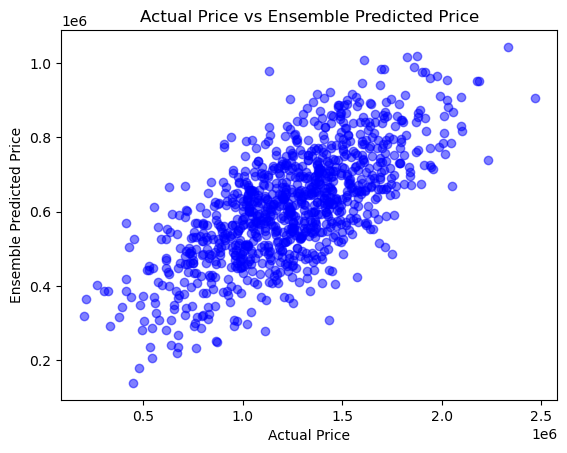

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('USA_Housing.csv')

# Split data into features and target
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
k = int(input("Enter the value of k for KNN Regressor: "))
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Train KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, max_iter=600, n_init=1)
kmeans.fit(X_train)

# Make predictions using both models
y_pred_knn = knn_regressor.predict(X_test)
labels_kmeans = kmeans.predict(X_test)

# Average predictions from both models
ensemble_predictions = (y_pred_knn + labels_kmeans) / 2

# Calculate Mean Squared Error for individual models
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_kmeans = mean_squared_error(y_test, labels_kmeans)

# Print models with their MSE values
print("Mean Squared Error for KNN Regressor:", mse_knn)
print("Mean Squared Error for KMeans Clustering:", mse_kmeans)

# Print models with high accuracy
if mse_knn < mse_kmeans:
    print("KNN Regressor has higher accuracy.")
elif mse_kmeans < mse_knn:
    print("KMeans Clustering has higher accuracy.")
else:
    print("Both models have the same accuracy.")

# Plot the ensemble predictions
plt.scatter(y_test, ensemble_predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Ensemble Predicted Price')
plt.title('Actual Price vs Ensemble Predicted Price')
plt.show()


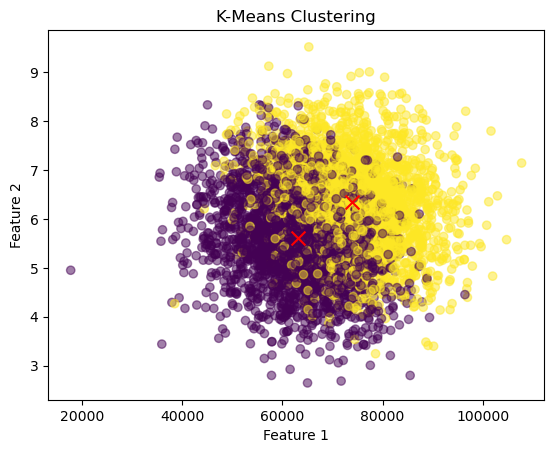

InvalidParameterError: The 'y' parameter of label_binarize must be an array-like. Got Ellipsis instead.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

# Load data
df = pd.read_csv('USA_Housing.csv')

# Assuming y_test is defined in your code
y_test = ...  # Define y_test appropriately

# Extract numeric data
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Silhouette Score for evaluation
silhouette_scores = []
for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter=600, n_init=1)
    kmeans.fit(numeric_data)
    silhouette_score_val = silhouette_score(numeric_data, kmeans.labels_)
    silhouette_scores.append(silhouette_score_val)

n_clusters_index = np.argmax(silhouette_scores) + 2  
n_clusters = n_clusters_index

# KMeans with chosen n_clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=600, n_init=1)
kmeans.fit(numeric_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualization (unchanged)
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Assuming y_probs is defined in your code
y_probs = ...  # Define y_probs appropriately

# Binarize the labels
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute evaluation metrics for each class
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average='macro')
recall_stacking = recall_score(y_test, y_pred_stacking, average='macro')
f1_stacking = f1_score(y_test, y_pred_stacking, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1 Score:", f1_stacking)


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


TypeError: tri() missing 1 required positional argument: 'N'

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load the dataset from CSV file
df = pd.read_csv('USA_Housing.csv')

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Address'], axis=1)  # Exclude non-numeric columns and the target variable
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Linear Regression:
MAE: 80879.09722218302
MSE: 10089009299.499422
R2 Score: 0.917997170698532

Random Forest:
MAE: 94544.19385338077
MSE: 14465943016.036024
R2 Score: 0.8824217303588349


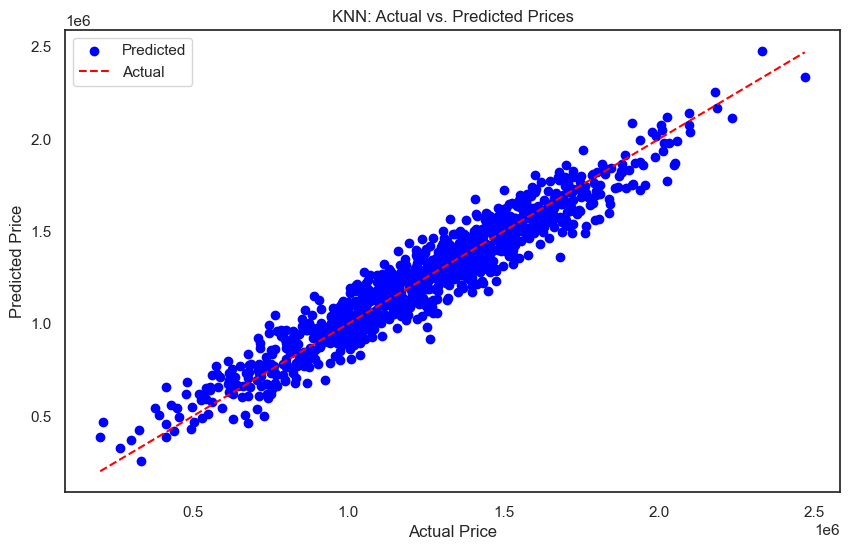

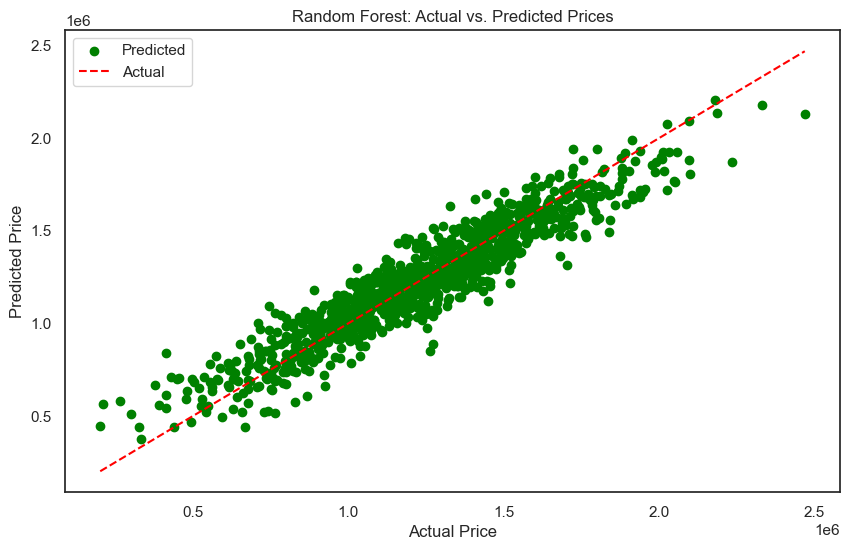

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the models
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear_reg))
print("MSE:", mean_squared_error(y_test, y_pred_linear_reg))
print("R2 Score:", r2_score(y_test, y_pred_linear_reg))

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_random_forest))
print("MSE:", mean_squared_error(y_test, y_pred_random_forest))
print("R2 Score:", r2_score(y_test, y_pred_random_forest))
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_reg, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.legend()
plt.show()

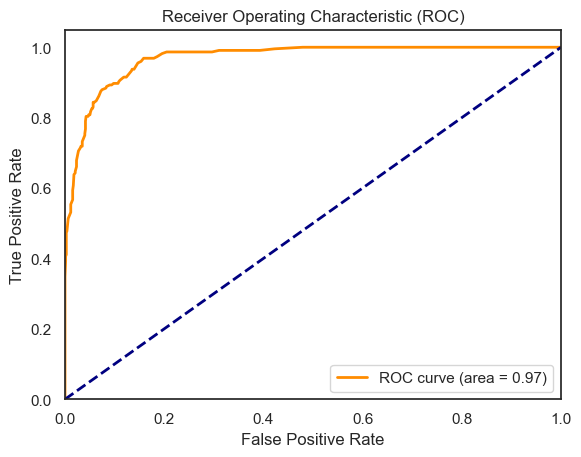

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


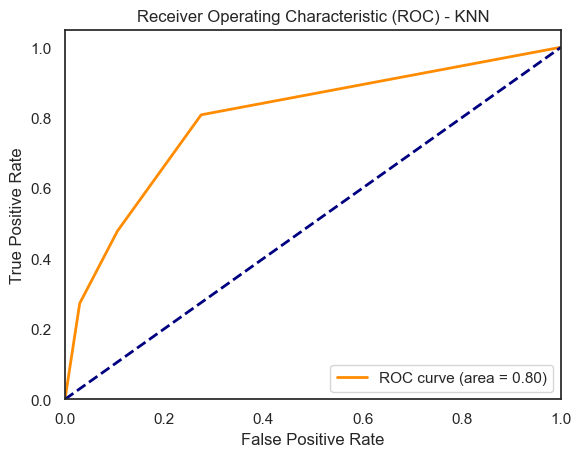

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc="lower right")
plt.show()


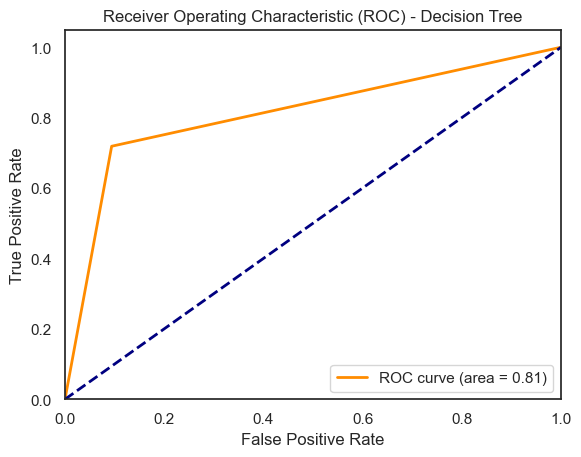

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()


C:\Users\raghavendra\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


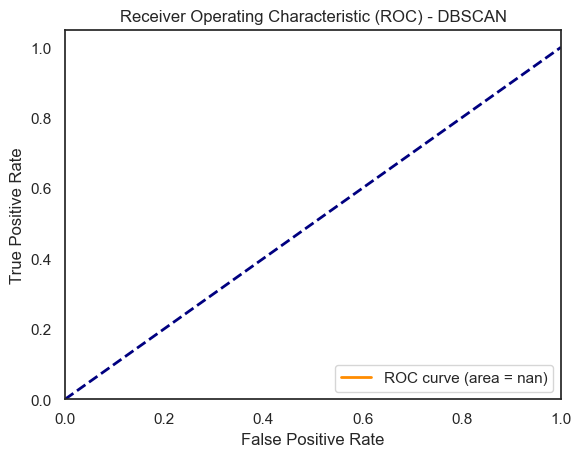

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Use only two features for simplicity (you can modify this)
X = df[['Avg. Area Income', 'Area Population']]

# Fit DBSCAN to the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Assign cluster labels to the data points
df['Cluster'] = y_dbscan

# Create a binary target variable based on the clusters
threshold_cluster = 0  # Consider cluster 0 as one class and other clusters as another class
df['Cluster_Class'] = (df['Cluster'] == threshold_cluster).astype(int)

# Split the dataset into training and testing sets
X = df[['Avg. Area Income', 'Area Population']]
y = df['Cluster_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., KNN) on the clustered data
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
if len(clf.classes_) > 1:
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
else:
    y_pred_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - DBSCAN')
plt.legend(loc="lower right")
plt.show()


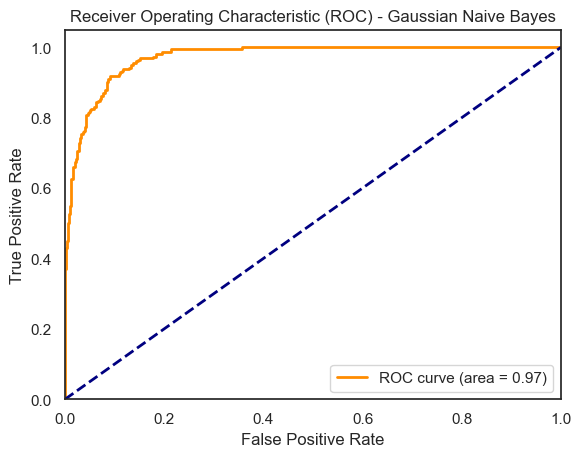

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()


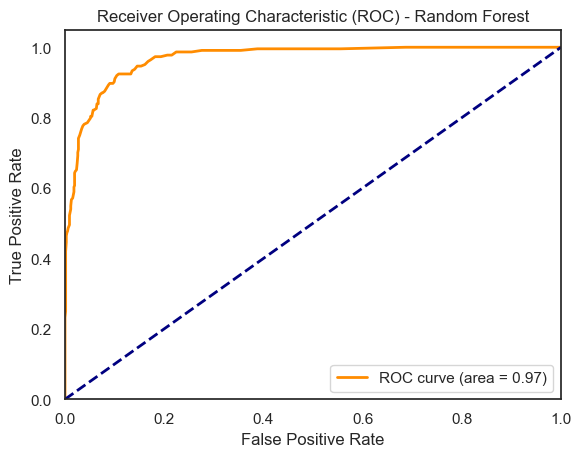

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


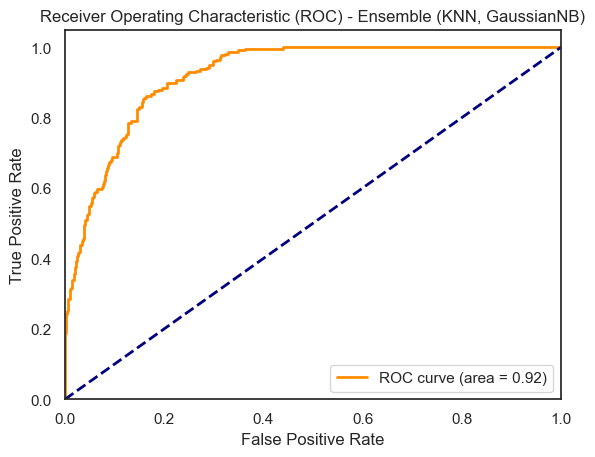

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable based on a price threshold
threshold = 1500000
df['Price_Class'] = (df['Price'] > threshold).astype(int)

# Split the dataset into training and testing sets
X = df.drop(['Price', 'Price_Class', 'Address'], axis=1)
y = df['Price_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual models
knn = KNeighborsClassifier(n_neighbors=3)
gnb = GaussianNB()

# Create the ensemble model using a VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn), ('gnb', gnb)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Ensemble (KNN, GaussianNB)')
plt.legend(loc="lower right")
plt.show()
